In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pickle

In [2]:
# Step 1: Load the Dataset
df = pd.read_csv(r"C:\Users\sneha\Downloads\COE_PROJ\Data\cleaned_dataset.csv")

In [3]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Savings_Efficiency,Essential_Expenses,Non_Essential_Expenses,Rent_to_Income_Ratio,Groceries_to_Income_Ratio,Total_Expenses_to_Income_Ratio,Discretionary_to_Income_Ratio,Savings_Target_Efficiency,Expense_Diversity_Index,User_ID
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,0.252382,24508.650001,4019.511102,0.30,0.149175,0.698187,0.090048,1.816879,0.161875,1
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,0.360288,10953.658450,2263.854847,0.20,0.104936,0.607338,0.084288,5.031685,0.116971,2
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,0.275801,24027.439185,3865.492522,0.15,0.125343,0.680484,0.076746,1.970318,0.079822,3
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,0.311643,47417.599430,10424.499110,0.15,0.144794,0.640164,0.102749,1.893862,0.087109,4
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,0.251885,13383.780612,1868.524377,0.20,0.121982,0.722552,0.075116,3.343313,0.103592,5


In [4]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Income_Tier', 'Total_Expenses',
       'Overspending_Flag', 'Savings_Efficiency', 'Essential_Expenses',
       'Non_Essential_Expenses', 'Rent_to_Income_Ratio',
       'Groceries_to_Income_Ratio', 'Total_Expenses_to_Income_Ratio',
       'Discretionary_to_Income_Ratio', 'Savings_Target_Efficiency',
       'Expense_Diversity_Index', 'User_ID'],
      dtype='object')

In [5]:
#Select Relevant Features for Anomaly Detection
selected_features = [
    'Income', 'Total_Expenses', 'Rent_to_Income_Ratio',
    'Groceries_to_Income_Ratio', 'Total_Expenses_to_Income_Ratio',
    'Savings_Efficiency', 'Discretionary_to_Income_Ratio',
    'Savings_Target_Efficiency'
]

In [6]:
#Prepare the Dataset
X = df[selected_features]

In [7]:
#  Train the Isolation Forest Model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
anomaly_flags = isolation_forest.fit_predict(X)

In [8]:
X['Anomaly_Flag'] = anomaly_flags  # Ensure this line is executed
print(X.head())  # Validate that 'Anomaly_Flag' exists in X

          Income  Total_Expenses  Rent_to_Income_Ratio  \
0   44637.249636    31165.131800                  0.30   
1   26858.596592    16312.255242                  0.20   
2   50367.605084    34274.354409                  0.15   
3  101455.600247    64948.228545                  0.15   
4   24875.283548    17973.675846                  0.20   

   Groceries_to_Income_Ratio  Total_Expenses_to_Income_Ratio  \
0                   0.149175                        0.698187   
1                   0.104936                        0.607338   
2                   0.125343                        0.680484   
3                   0.144794                        0.640164   
4                   0.121982                        0.722552   

   Savings_Efficiency  Discretionary_to_Income_Ratio  \
0            0.252382                       0.090048   
1            0.360288                       0.084288   
2            0.275801                       0.076746   
3            0.311643                     

C:\Users\sneha\AppData\Local\Temp\ipykernel_3464\1458431530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Anomaly_Flag'] = anomaly_flags  # Ensure this line is executed


In [9]:
print(X.columns)  # Check if 'Anomaly_Flag' exists in X

Index(['Income', 'Total_Expenses', 'Rent_to_Income_Ratio',
       'Groceries_to_Income_Ratio', 'Total_Expenses_to_Income_Ratio',
       'Savings_Efficiency', 'Discretionary_to_Income_Ratio',
       'Savings_Target_Efficiency', 'Anomaly_Flag'],
      dtype='object')


In [10]:
#Save Anomaly Results
anomalies = X[X['Anomaly_Flag'] == -1]
anomalies.to_csv('anomalies_detected.csv', index=False)
print(f"Total anomalies detected: {len(anomalies)}")
print("Sample anomalies:\n", anomalies.head())

# Optional: Save full context anomalies
anomalies_full_context = df.loc[X['Anomaly_Flag'] == -1]
anomalies_full_context.to_csv('anomalies_with_context.csv', index=False)
print("Anomalies with full context saved to anomalies_with_context.csv")

Total anomalies detected: 1000
Sample anomalies:
             Income  Total_Expenses  Rent_to_Income_Ratio  \
42    27348.966925    14488.632505                  0.15   
67    66955.197386    59418.284111                  0.20   
74     4529.542004     3380.251528                  0.30   
75    57900.115834    56653.313403                  0.30   
106  135659.233131   112486.196297                  0.30   

     Groceries_to_Income_Ratio  Total_Expenses_to_Income_Ratio  \
42                    0.102169                        0.529769   
67                    0.148803                        0.887433   
74                    0.147308                        0.916264   
75                    0.137179                        0.948340   
106                   0.115150                        0.829182   

     Savings_Efficiency  Discretionary_to_Income_Ratio  \
42             0.444178                       0.103689   
67             0.076039                       0.101425   
74             0.0

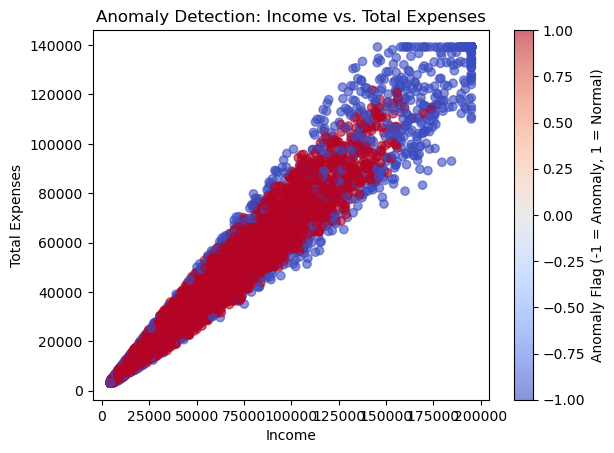

In [11]:
# Visualize Anomalies
plt.scatter(X['Income'], X['Total_Expenses'], c=X['Anomaly_Flag'], cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection: Income vs. Total Expenses')
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.colorbar(label='Anomaly Flag (-1 = Anomaly, 1 = Normal)')
plt.show()

In [12]:
# Test Function and Inputs
def test_anomaly_detection(input_data, model):
    test_df = pd.DataFrame([input_data])
    anomaly_flag = model.predict(test_df)
    status = "Anomaly" if anomaly_flag[0] == -1 else "Normal"
    print(f"Input: {input_data}\nPrediction: {status}\n")

In [13]:
#example inputs
test_input_existing = {
    'Income': 60000, 'Total_Expenses': 48000, 'Rent_to_Income_Ratio': 0.3,
    'Groceries_to_Income_Ratio': 0.12, 'Total_Expenses_to_Income_Ratio': 0.8,
    'Savings_Efficiency': 0.15, 'Discretionary_to_Income_Ratio': 0.2,
    'Savings_Target_Efficiency': 0.85
}
test_input_outlier = {
    'Income': 30000, 'Total_Expenses': 50000, 'Rent_to_Income_Ratio': 1.5,
    'Groceries_to_Income_Ratio': 0.6, 'Total_Expenses_to_Income_Ratio': 1.67,
    'Savings_Efficiency': -0.5, 'Discretionary_to_Income_Ratio': 0.8,
    'Savings_Target_Efficiency': 0.2
}
print("Testing Existing Data:")
test_anomaly_detection(test_input_existing, isolation_forest)
print("Testing Outlier Data:")
test_anomaly_detection(test_input_outlier, isolation_forest)

Testing Existing Data:
Input: {'Income': 60000, 'Total_Expenses': 48000, 'Rent_to_Income_Ratio': 0.3, 'Groceries_to_Income_Ratio': 0.12, 'Total_Expenses_to_Income_Ratio': 0.8, 'Savings_Efficiency': 0.15, 'Discretionary_to_Income_Ratio': 0.2, 'Savings_Target_Efficiency': 0.85}
Prediction: Normal

Testing Outlier Data:
Input: {'Income': 30000, 'Total_Expenses': 50000, 'Rent_to_Income_Ratio': 1.5, 'Groceries_to_Income_Ratio': 0.6, 'Total_Expenses_to_Income_Ratio': 1.67, 'Savings_Efficiency': -0.5, 'Discretionary_to_Income_Ratio': 0.8, 'Savings_Target_Efficiency': 0.2}
Prediction: Anomaly



In [14]:
# Save the model to a .pkl file
with open('isolation_forest_model.pkl', 'wb') as file:
    pickle.dump(isolation_forest, file)
print("Isolation Forest model saved as 'isolation_forest_model.pkl'")

Isolation Forest model saved as 'isolation_forest_model.pkl'


In [15]:
# Save evaluation metrics
with open('anomaly_detection_metrics.txt', 'w') as f:
    f.write(f"Total anomalies detected: {len(anomalies)}\n")
    f.write("Anomaly Summary (Selected Features):\n")
    f.write(str(anomalies.describe()))
print("Evaluation metrics saved as 'anomaly_detection_metrics.txt'")

Evaluation metrics saved as 'anomaly_detection_metrics.txt'
